In [4]:
# fbprophet for 30 minute prediction

import pandas as pd
from prophet import Prophet

In [5]:
df = pd.read_csv('KE2019.csv')
df.head()

,ds,KE
0,1/1/2019 0:01,171
1,1/1/2019 0:02,170
2,1/1/2019 0:03,170
3,1/1/2019 0:04,170
4,1/1/2019 0:05,170


In [6]:
df["ds"]= pd.to_datetime(df['ds'])
df['y'] = df['KE']/52.660 
df.tail()

,ds,KE,y
525599,2019-12-31 23:55:00,134,2.544626
525600,2019-12-31 23:56:00,134,2.544626
525601,2019-12-31 23:57:00,134,2.544626
525602,2019-12-31 23:58:00,134,2.544626
525603,2019-12-31 23:59:00,134,2.544626


In [7]:
df.drop('KE', axis=1, inplace=True)

In [5]:
prediction_size = 30
train_df = df[:-prediction_size]

In [6]:
import time
start_time = time.time()

# Model Training
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=60, freq='1min')
forecast = m.predict(future)

print("Execution Time: %s min" % ((time.time() - start_time)/60))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Execution Time: 31.057217820485434 min


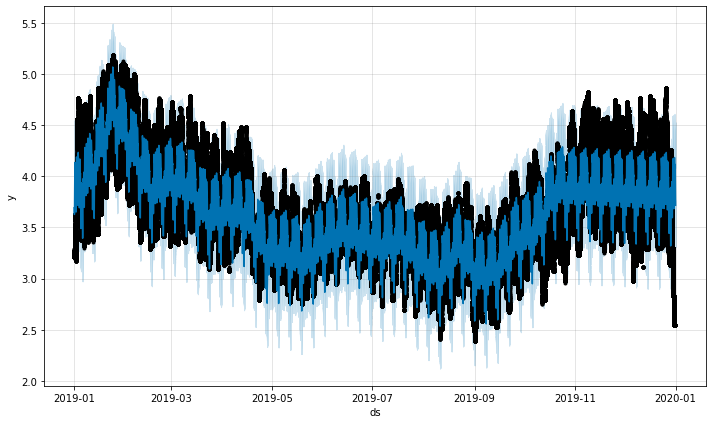

In [7]:
m.plot(forecast).savefig('2.jpeg', dpi=400)

In [8]:
forecast.to_csv('525603_inertia.csv')

In [8]:
df1 = pd.read_csv('525603_inertia.csv')

In [9]:
df1.tail(30)

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
525597,525597,2020-01-01 00:00:00,3.901456,3.357384,4.127099,3.901456,3.901456,-0.161378,-0.161378,-0.161378,-0.249975,-0.249975,-0.249975,0.088597,0.088597,0.088597,0.0,0.0,0.0,3.740079
525598,525598,2020-01-01 00:01:00,3.901456,3.377333,4.099783,3.901456,3.901456,-0.162249,-0.162249,-0.162249,-0.250879,-0.250879,-0.250879,0.088630,0.088630,0.088630,0.0,0.0,0.0,3.739207
525599,525599,2020-01-01 00:02:00,3.901455,3.358233,4.115756,3.901455,3.901455,-0.163115,-0.163115,-0.163115,-0.251778,-0.251778,-0.251778,0.088663,0.088663,0.088663,0.0,0.0,0.0,3.738340
525600,525600,2020-01-01 00:03:00,3.901454,3.351964,4.114376,3.901454,3.901454,-0.163975,-0.163975,-0.163975,-0.252671,-0.252671,-0.252671,0.088696,0.088696,0.088696,0.0,0.0,0.0,3.737479
525601,525601,2020-01-01 00:04:00,3.901454,3.366333,4.119379,3.901454,3.901454,-0.164831,-0.164831,-0.164831,-0.253560,-0.253560,-0.253560,0.088729,0.088729,0.088729,0.0,0.0,0.0,3.736623
525602,525602,2020-01-01 00:05:00,3.901453,3.332151,4.130592,3.901453,3.901453,-0.165682,-0.165682,-0.165682,-0.254444,-0.254444,-0.254444,0.088762,0.088762,0.088762,0.0,0.0,0.0,3.735771
525603,525603,2020-01-01 00:06:00,3.901453,3.360337,4.132344,3.901453,3.901453,-0.166527,-0.166527,-0.166527,-0.255322,-0.255322,-0.255322,0.088795,0.088795,0.088795,0.0,0.0,0.0,3.734925
525604,525604,2020-01-01 00:07:00,3.901452,3.310752,4.121042,3.901452,3.901452,-0.167368,-0.167368,-0.167368,-0.256196,-0.256196,-0.256196,0.088828,0.088828,0.088828,0.0,0.0,0.0,3.734084
525605,525605,2020-01-01 00:08:00,3.901451,3.337900,4.124626,3.901451,3.901451,-0.168203,-0.168203,-0.168203,-0.257064,-0.257064,-0.257064,0.088861,0.088861,0.088861,0.0,0.0,0.0,3.733248
525606,525606,2020-01-01 00:09:00,3.901451,3.320672,4.117611,3.901451,3.901451,-0.169033,-0.169033,-0.169033,-0.257928,-0.257928,-0.257928,0.088895,0.088895,0.088895,0.0,0.0,0.0,3.732418


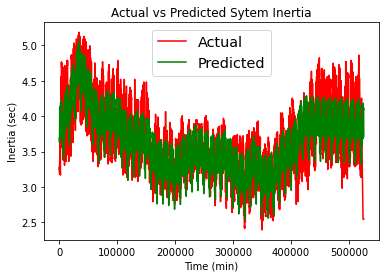

In [12]:
import matplotlib.pyplot as plt
plt.figure()
x1 = list(range(0, 525604))
plt.plot(x1, df['y'],'r-', label='Actual')
x2 = list(range(0, 525627))
plt.plot(x2, df1['yhat'],'g-', label='Predicted')
plt.legend(loc='best', fontsize='x-large')
plt.title('Actual vs Predicted Sytem Inertia')
plt.xlabel('Time (min)')
plt.ylabel('Inertia (sec)')
plt.savefig('Actual vs Predicted Sytem Inertia 1 year.jpeg', dpi=300)
plt.show()